In [ ]:
import zipfile
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, ZeroPadding2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = "/content/drive/MyDrive/Cat_dog_images.zip"

In [ ]:
with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall('/content/data')

In [ ]:
base_dir= '/content/data/Cat_dog_images'
cat_dir =os.path.join(base_dir,'cats')
dog_dir =os.path.join(base_dir,'dogs')

In [ ]:
IMG_SIZE =224 #standard size of VGG,ResNet

In [ ]:
def prepare_dataset(cat_dir,dog_dir):
  images,labels =[],[]
  for img_name in os.listdir(cat_dir):
        img_path = os.path.join(cat_dir, img_name)
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img) / 255.0  # Normalize so every pixel is 0 to 1
        images.append(img_array)
        labels.append(0)  # Class 0 for cats

  for img_name in os.listdir(dog_dir):
        img_path = os.path.join(dog_dir, img_name)
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(1)  # Class 1 for dogs

  return np.array(images), np.array(labels)

In [ ]:
x,y,=prepare_dataset(cat_dir,dog_dir)

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = Sequential()

In [ ]:
#First layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))) #32 filters of 3x3 size
model.add(ZeroPadding2D(padding=(1, 1)))
model.add(AveragePooling2D(pool_size=(2, 2)))

#second layer
model.add(Conv2D(64, (3, 3), activation='relu')) #64 filters of 3x3 size
model.add(ZeroPadding2D(padding=(1, 1)))
model.add(AveragePooling2D(pool_size=(3, 3)))

model.add(Flatten()) #represent image in vector

model.add(Dense(128, activation='relu')) #128 hidden layer
model.add(Dense(1, activation='sigmoid')) #output layer. if multiclass then softmax and total number of classes instead of 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#trainable parameter bhaneko model le learn garne kura
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d (ZeroPadding2D)       │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 110, 110, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_1 (ZeroPadding2D)     │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 37, 37, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,214,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,234,497 (42.86 MB)

 Trainable params: 11,234,497 (42.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val),batch_size=16)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 539ms/step - accuracy: 0.5441 - loss: 1.2228 - val_accuracy: 0.5476 - val_loss: 0.6786
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4553 - loss: 0.6988 - val_accuracy: 0.5476 - val_loss: 0.6706
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5561 - loss: 0.6600 - val_accuracy: 0.5952 - val_loss: 0.6666
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7371 - loss: 0.5607 - val_accuracy: 0.7381 - val_loss: 0.6965
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7383 - loss: 0.5220 - val_accuracy: 0.5000 - val_loss: 0.7173
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8539 - loss: 0.4218 - val_accuracy: 0.4762 - val_loss: 0.8285
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8262 - loss: 0.4381 - val_accuracy: 0.5476 - val_loss: 0.8308
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9009 - loss: 0.2674 - val_accuracy: 0.5952 -

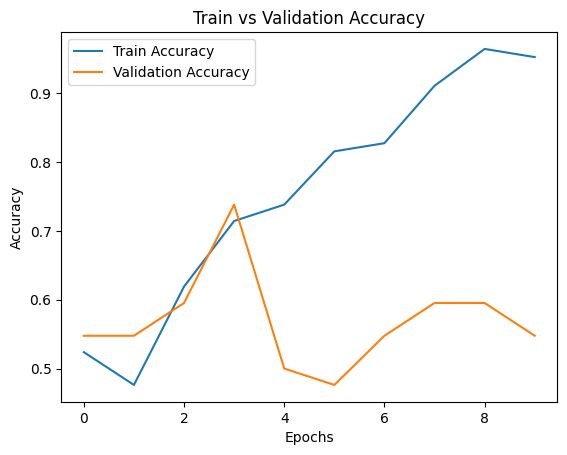

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


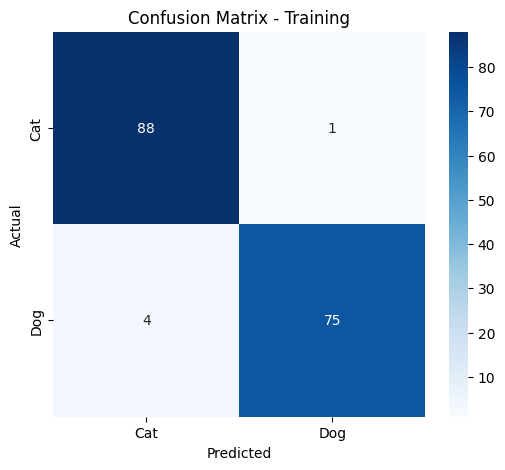

In [ ]:
y_train_pred = (model.predict(x_train) > 0.5).astype("int32")
y_val_pred = (model.predict(x_val) > 0.5).astype("int32")
train_cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix - Training')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()